In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('train_new.csv')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,It has no side effect I take it in combination...,9.0,"May 20, 2012",27
1,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,"April 27, 2010",192
2,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,"November 27, 2016",37


**most common condition**

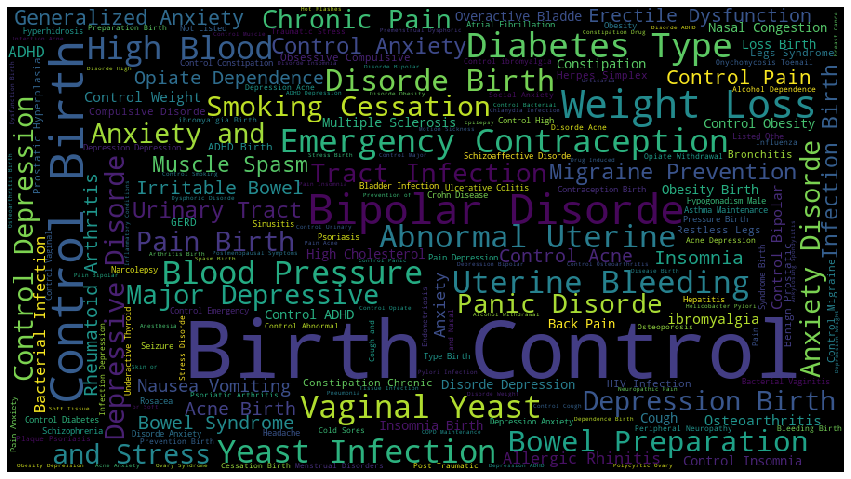

In [6]:
stop = set(STOPWORDS)

long_string = ','.join(list(df['condition']))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", stopwords=stop, width = 900, height = 500)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
#wordcloud.to_image()
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**most popular drug**

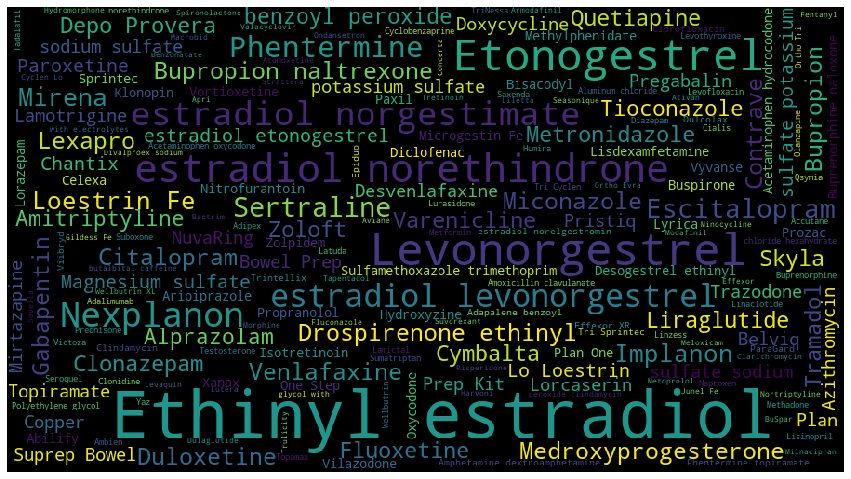

In [7]:
con = ','.join(list(df['drugName']))

# Create a WordCloud object
wordcloud_drug = WordCloud(background_color="black", stopwords=stop, width = 900, height = 500)

# Generate a word cloud
wordcloud_drug.generate(con)

# Visualize the word cloud
#wordcloud.to_image()
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_drug)
plt.axis('off')
plt.show()

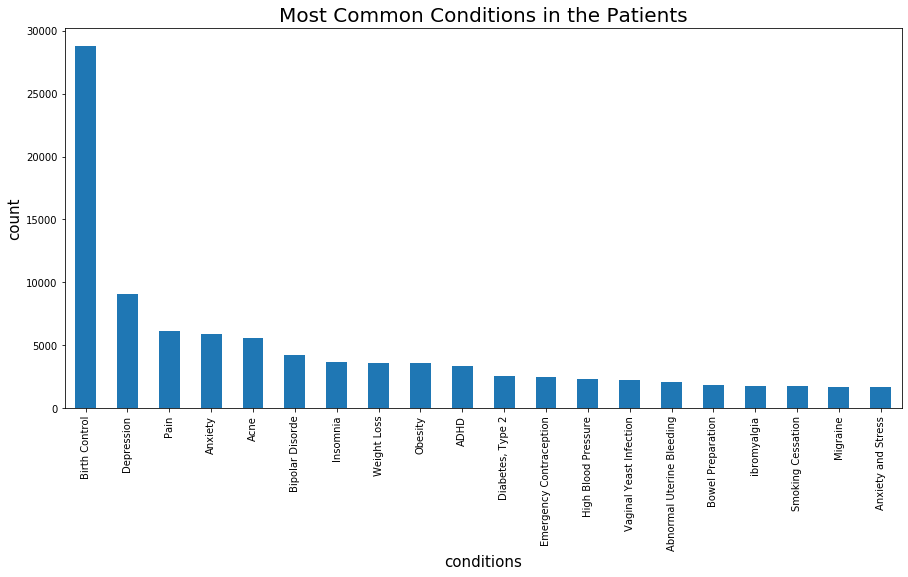

In [8]:
# checking the most common conditions in patients
df['condition'].value_counts().head(20).plot.bar(figsize = (15, 7))
plt.title('Most Common Conditions in the Patients', fontsize = 20)
plt.xlabel('conditions', fontsize = 15)
plt.ylabel('count',fontsize=15)
plt.show()

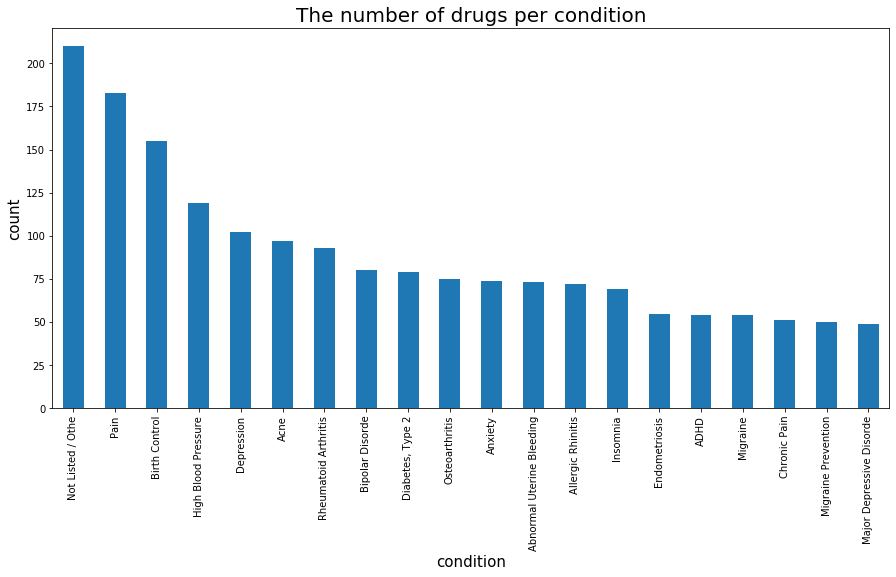

In [9]:
#number of drugs per condition
no_of_drugs = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
no_of_drugs[0:20].plot(kind="bar", figsize = (15,7))
plt.xlabel("condition", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.title("The number of drugs per condition", fontsize = 20)
plt.show()

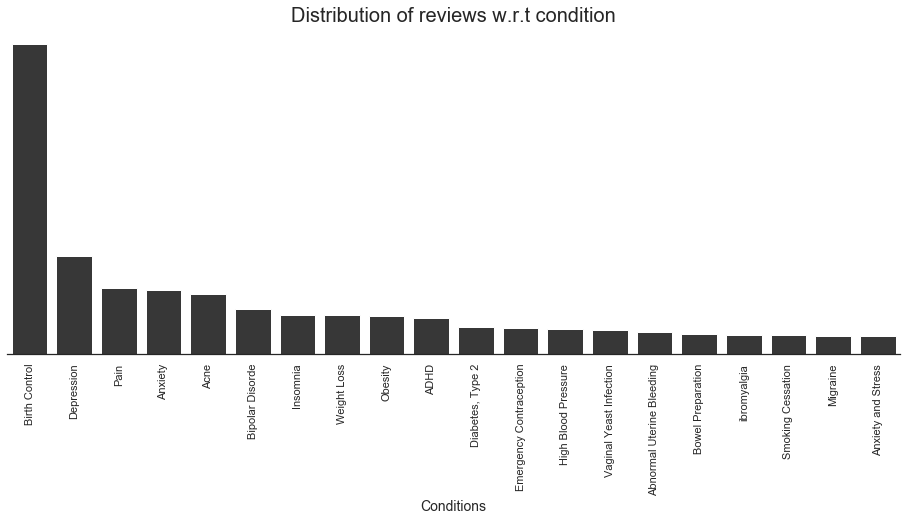

In [17]:
conditionDF = pd.DataFrame(df.groupby(['condition']).count().sort_values(by='usefulCount',ascending=False)['usefulCount'])[:20].reset_index()

plt.figure(figsize=(16,6))
sb.set(style="white")
g= sb.barplot(x="condition",y="usefulCount",data=conditionDF,color=(0.21569, 0.21569 ,0.21569))

g.set_xticklabels(rotation=90,labels=conditionDF['condition'])
g.set(yticklabels=[])
g.set_ylabel('')
g.axes.set_title("Distribution of reviews w.r.t condition",fontsize=20)
g.set_xlabel('Conditions',fontsize=14)
sb.despine(left=True)

#locs, labels = plt.xticks() # get the current tick locations and labels

#for loc, label in zip(locs, labels):
 #   count = conditionDF.iloc[loc].usefulCount
  #  plt.text(loc, count-8, '{:0.0f}'.format(count), ha='center', va='bottom' ,color = 'black',size=13)

**ratings**

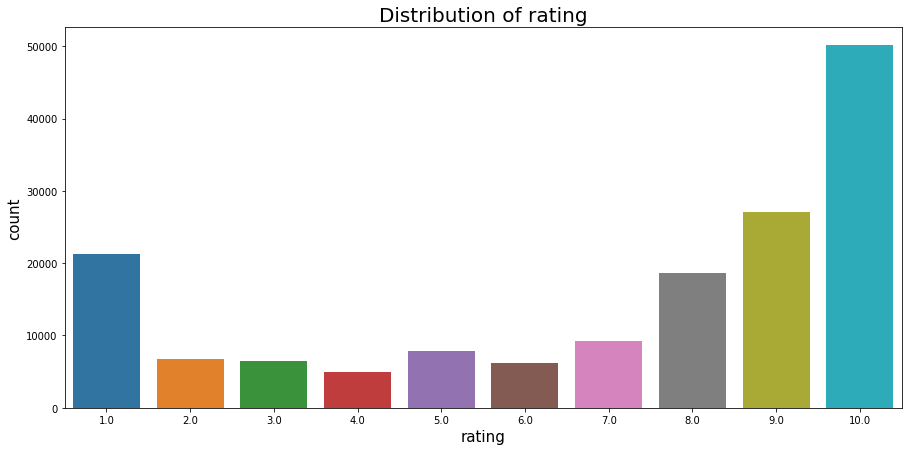

In [11]:
plt.figure(figsize=(15,7))
sb.countplot(df['rating'])
plt.title('Distribution of rating',fontsize=20)
plt.xlabel('rating',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

In [18]:
# feature engineering 
# let's make a new column review sentiment 
df.loc[(df['rating'] >7), 'Sentiment'] = 'positive'
df.loc[(df['rating'] < 4), 'Sentiment'] = 'negative'
df.loc[(df['rating'] >= 4) & (df['rating']<=7), 'Sentiment'] = 'neutral'

df['Sentiment'].value_counts()

positive    95780
negative    34480
neutral     28324
Name: Sentiment, dtype: int64

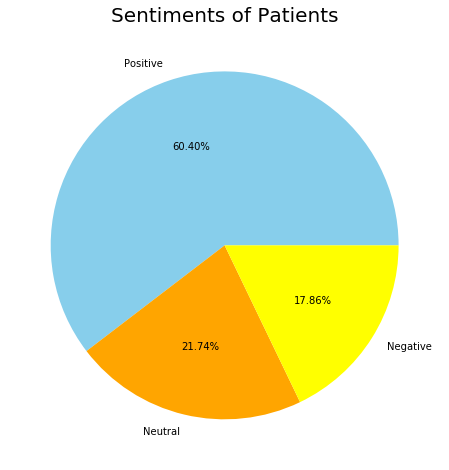

In [19]:
# a pie chart to represent the sentiments of the patients
size = [95780, 34480, 28324]
colors = ['skyblue', 'orange','yellow']
labels = 'Positive','Neutral','Negative'

plt.figure(figsize= (8, 8))
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Sentiments of Patients', fontsize = 20)
plt.show()

In [20]:
df.head()

,drugName,condition,review,rating,date,usefulCount,Sentiment
0,Valsartan,Left Ventricular Dysfunction,It has no side effect I take it in combination...,9.0,"May 20, 2012",27,positive
1,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,"April 27, 2010",192,positive
2,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,"December 14, 2009",17,neutral
3,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,"November 3, 2015",10,positive
4,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,"November 27, 2016",37,positive


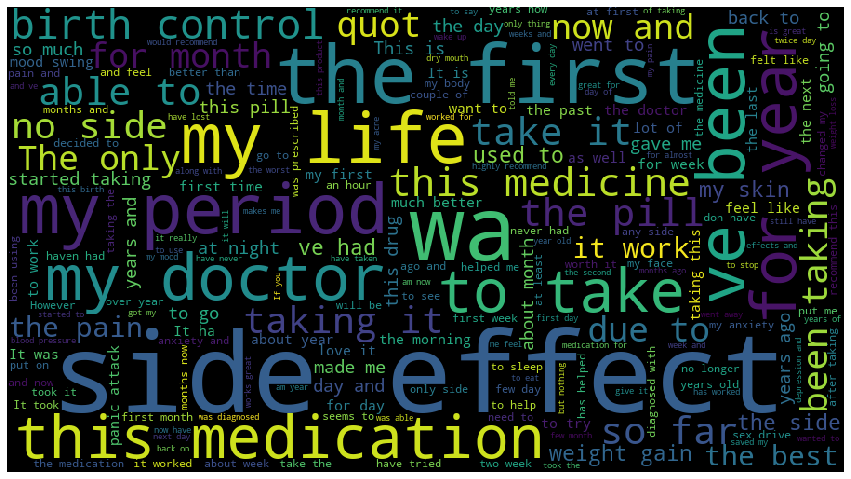

In [21]:
#wordcloud of positive sentiments
positive_sentiments = " ".join([text for text in df['review'][df['Sentiment'] == 'positive']])

wordcloud_pos = WordCloud(background_color="black", stopwords=stop, width = 900, height = 500)

# Generate a word cloud
wordcloud_pos.generate(positive_sentiments)

# Visualize the word cloud
#wordcloud.to_image()
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

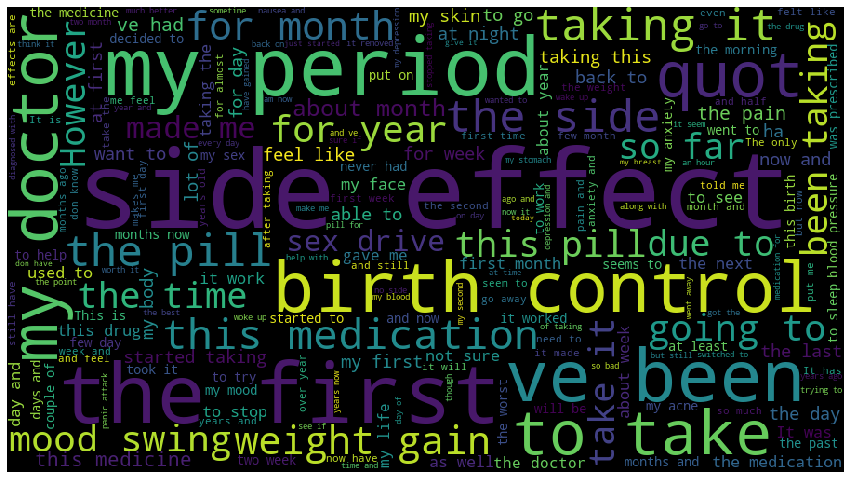

In [22]:
#wordcloud of neutral sentiments
neutral_sentiments = " ".join([text for text in df['review'][df['Sentiment'] == 'neutral']])

wordcloud_neu = WordCloud(background_color="black", stopwords=stop, width = 900, height = 500)

# Generate a word cloud
wordcloud_neu.generate(neutral_sentiments)

# Visualize the word cloud
#wordcloud.to_image()
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_neu)
plt.axis('off')
plt.show()

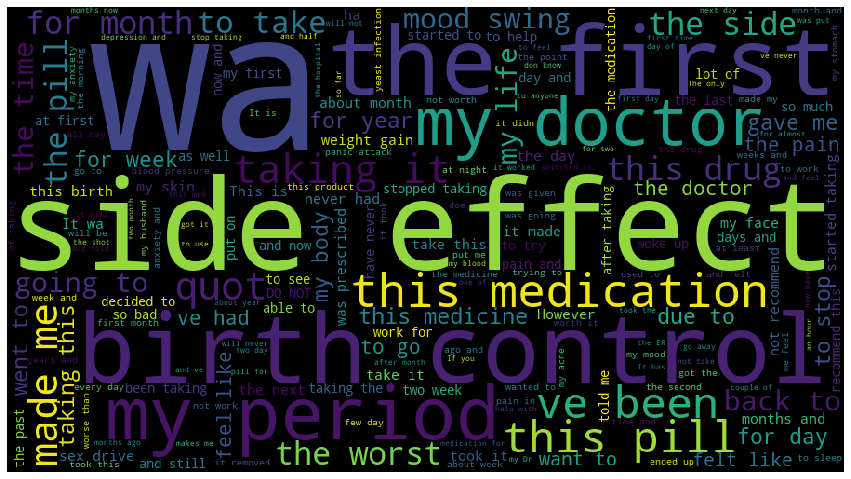

In [24]:
#wordcloud of negative sentiments
negative_sentiments = " ".join([text for text in df['review'][df['Sentiment'] == 'negative']])

wordcloud_neg = WordCloud(background_color="black", stopwords=stop, width = 900, height = 500)

# Generate a word cloud
wordcloud_neg.generate(negative_sentiments)

# Visualize the word cloud
#wordcloud.to_image()
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

**exploring data**

In [32]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# now extracting year from date
df['year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

In [34]:
df.head()

,drugName,condition,review,rating,date,usefulCount,Sentiment,year,month,day
0,Valsartan,Left Ventricular Dysfunction,It has no side effect I take it in combination...,9.0,2012-05-20,27,positive,2012,5,20
1,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,2010-04-27,192,positive,2010,4,27
2,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,2009-12-14,17,neutral,2009,12,14
3,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,2015-11-03,10,positive,2015,11,3
4,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,2016-11-27,37,positive,2016,11,27


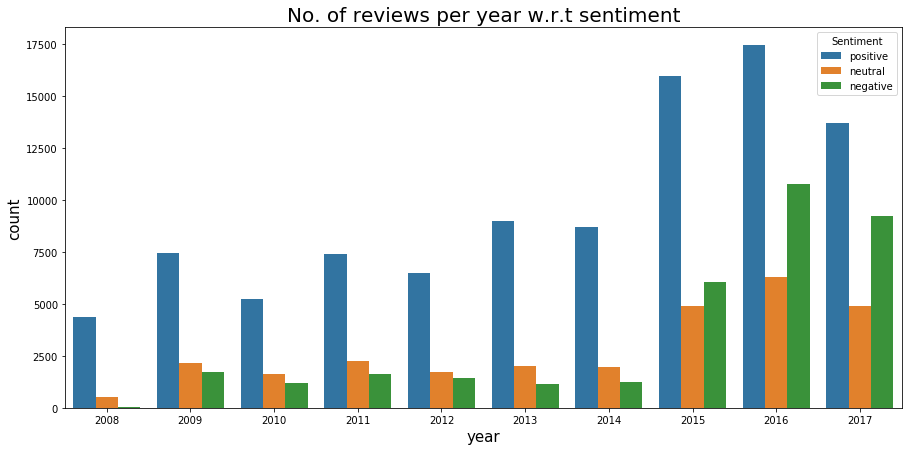

In [43]:
plt.figure(figsize=(15,7))
sb.countplot(df['year'],hue=df['Sentiment'])
plt.title('No. of reviews every year w.r.t sentiment',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

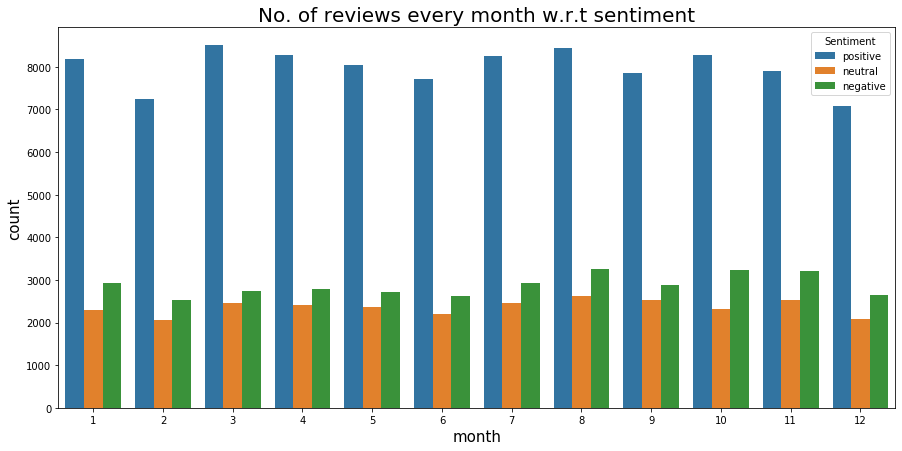

In [45]:
plt.figure(figsize=(15,7))
sb.countplot(df['month'],hue=df['Sentiment'])
plt.title('No. of reviews every month w.r.t sentiment',fontsize=20)
plt.xlabel('month',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**plotting most important words**<br/>
https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

In [81]:
def get_top_n_words(corpus, ngram=(1,1)):
    vec = CountVectorizer(stop_words = 'english', ngram_range=ngram, lowercase=True).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:40]

**unigram**

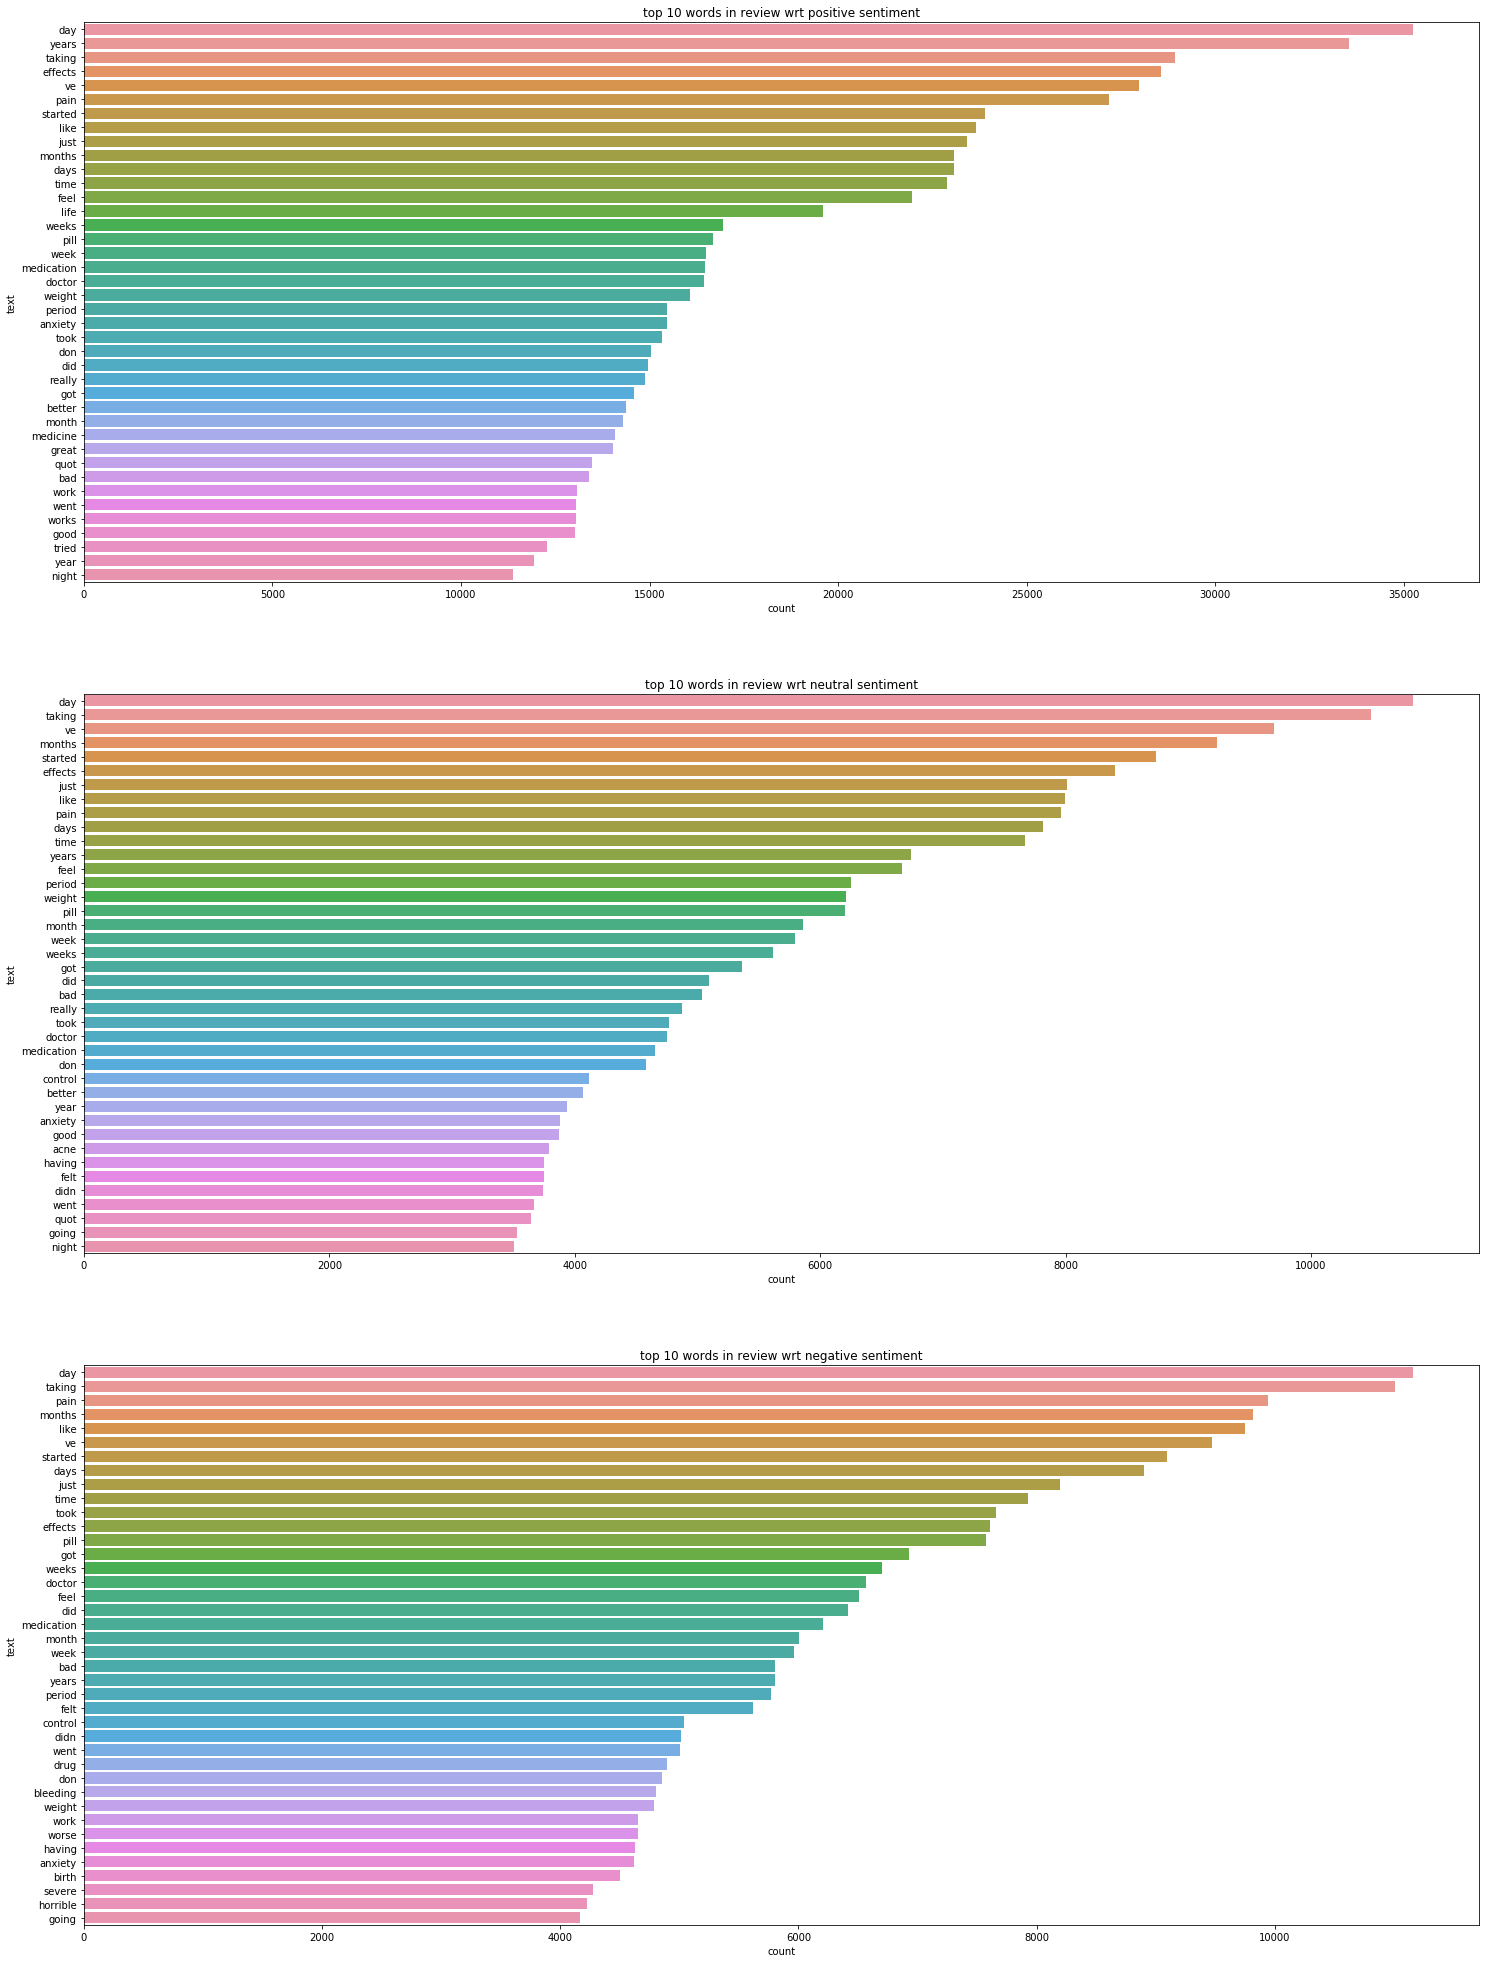

In [95]:
df_pos_1 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'positive']),columns=['text','count'])
df_neu_1 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'neutral']), columns=['text','count'])
df_neg_1 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'negative']),columns=['text','count'])

plt.figure(figsize=(25,35))

plt.subplot(3,1,1)
sb.barplot(y='text',x='count',data=df_pos_1)
plt.title('top 10 words in review wrt positive sentiment')

plt.subplot(3,1,2)
sb.barplot(y='text',x='count',data=df_neu_1)
plt.title('top 10 words in review wrt neutral sentiment')

plt.subplot(3,1,3)
sb.barplot(y='text',x='count',data=df_neg_1)
plt.title('top 10 words in review wrt negative sentiment')

plt.show()

**bigram**

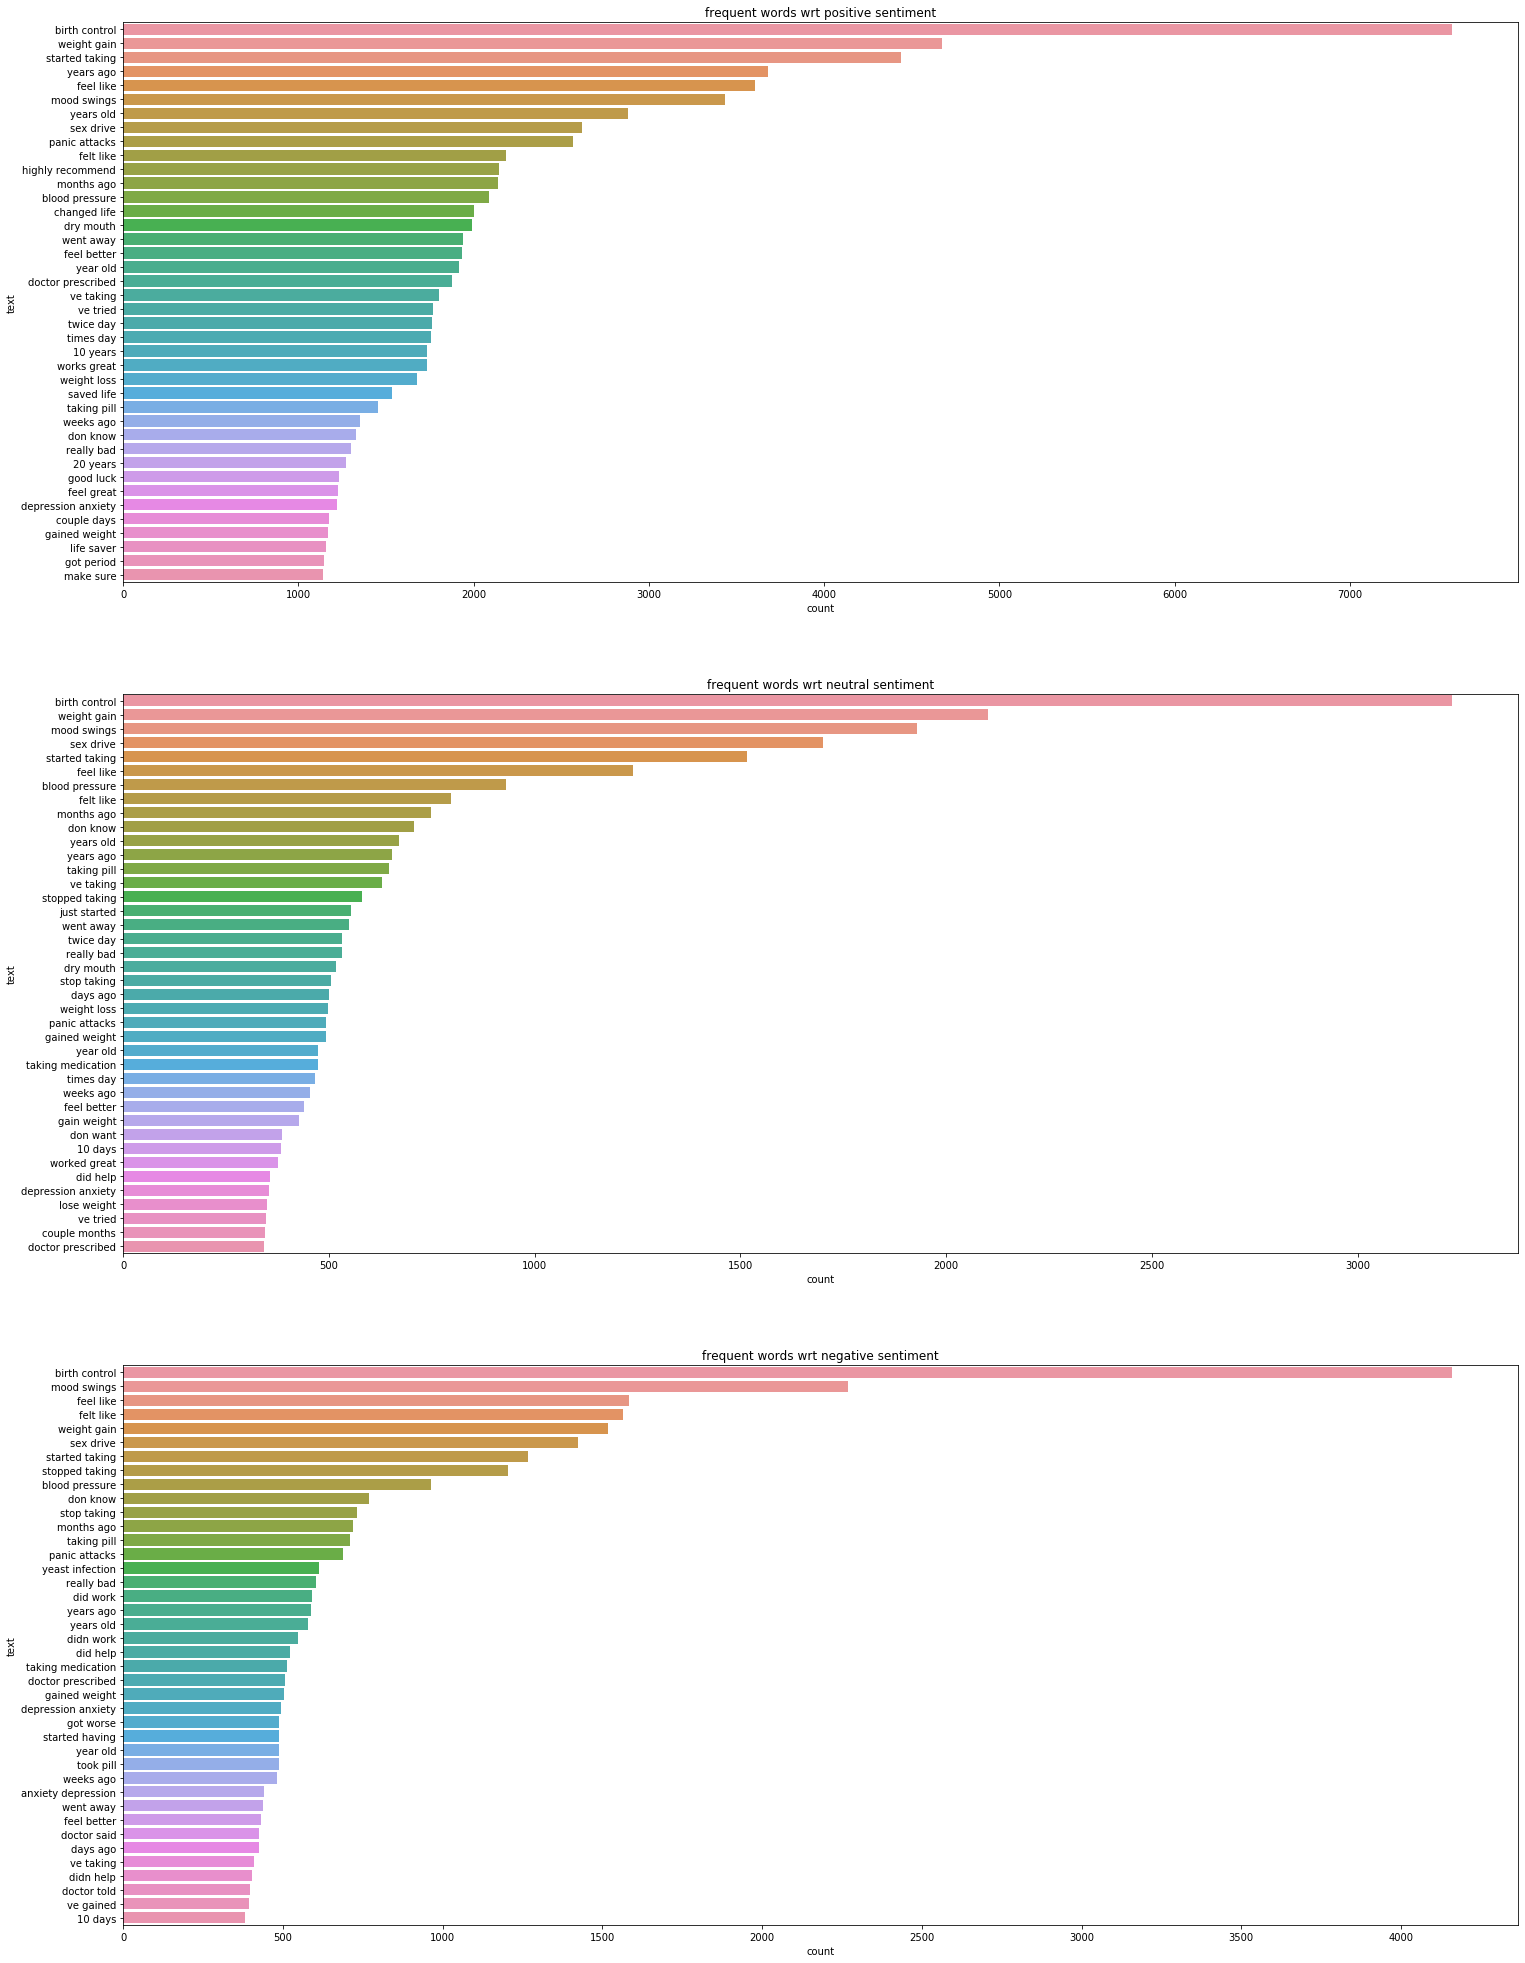

In [98]:
df_pos_2 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'positive'],ngram=(2,2)),columns=['text','count'])
df_neu_2 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'neutral'],ngram=(2,2)), columns=['text','count'])
df_neg_2 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'negative'],ngram=(2,2)),columns=['text','count'])

plt.figure(figsize=(25,35))

plt.subplot(3,1,1)
sb.barplot(y='text',x='count',data=df_pos_2)
plt.title('frequent words wrt positive sentiment')

plt.subplot(3,1,2)
sb.barplot(y='text',x='count',data=df_neu_2)
plt.title('frequent words wrt neutral sentiment')

plt.subplot(3,1,3)
sb.barplot(y='text',x='count',data=df_neg_2)
plt.title('frequent words wrt negative sentiment')

plt.show()

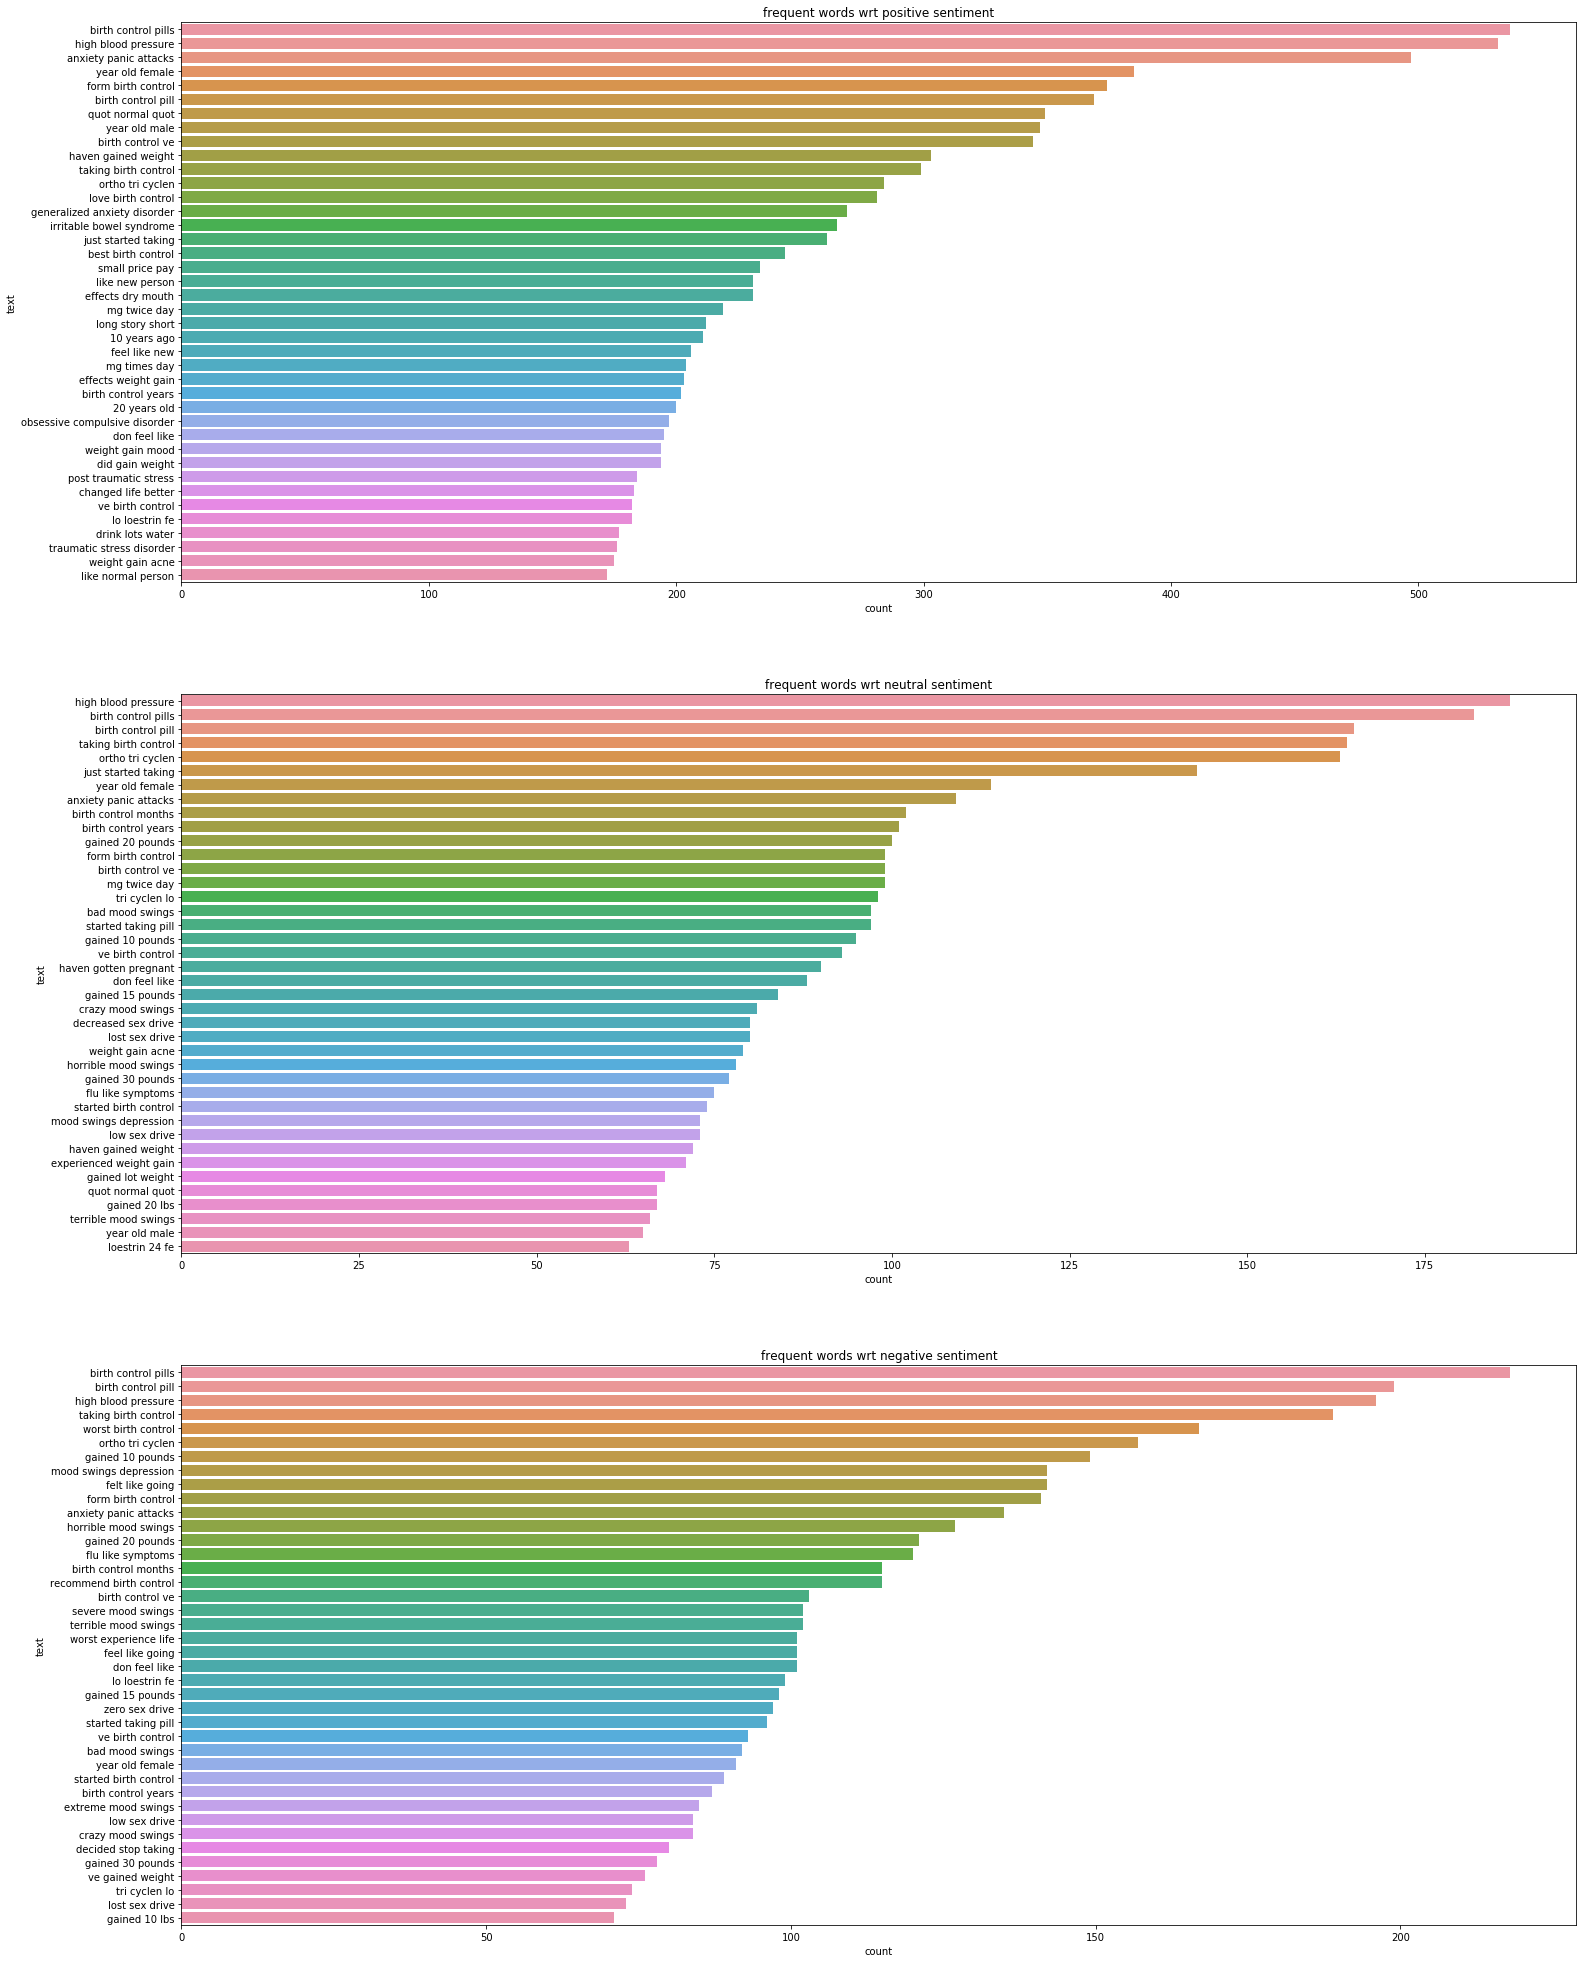

In [99]:
df_pos_3 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'positive'],ngram=(3,3)),columns=['text','count'])
df_neu_3 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'neutral'],ngram=(3,3)), columns=['text','count'])
df_neg_3 = pd.DataFrame(get_top_n_words(df['review'][df['Sentiment'] == 'negative'],ngram=(3,3)),columns=['text','count'])

plt.figure(figsize=(25,35))

plt.subplot(3,1,1)
sb.barplot(y='text',x='count',data=df_pos_3)
plt.title('frequent words wrt positive sentiment')

plt.subplot(3,1,2)
sb.barplot(y='text',x='count',data=df_neu_3)
plt.title('frequent words wrt neutral sentiment')

plt.subplot(3,1,3)
sb.barplot(y='text',x='count',data=df_neg_3)
plt.title('frequent words wrt negative sentiment')

plt.show()